# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,fbeta_score
import matplotlib.ticker as mtick
import statsmodels.api as sm
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.shape

(7043, 21)

## Data Cleaning

In [6]:
# check data type of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# convert 'TotalCharges' to a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [8]:
# check null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# remove null values
df.dropna(inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

## Target variable

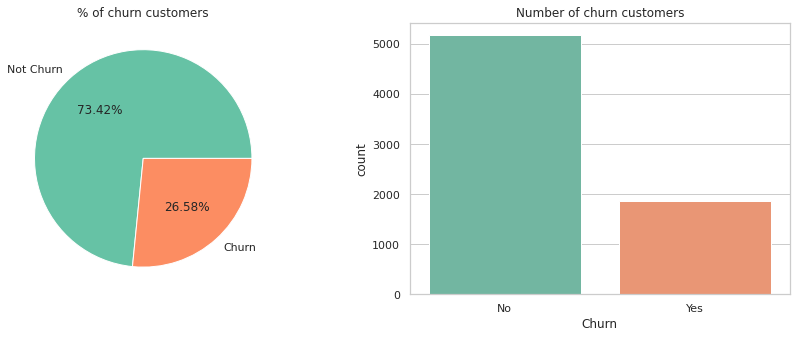

In [11]:
# churn distribution
churn_num = list(df['Churn'].value_counts())
churn_per = [(churn_num[0] / len(df)) * 100, (churn_num[1] / len(df)) * 100]

sns.set_theme(style = 'whitegrid', palette = 'Set2')
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
plt.subplot(1, 2 ,1)
plt.title('% of churn customers')
ax[0].pie(churn_per, labels = ['Not Churn', 'Churn'], autopct = '%1.2f%%')

plt.subplot(1, 2 ,2)
plt.title('Number of churn customers')
ax[1] = sns.countplot(x = 'Churn',
                      data = df)
plt.show()


## Categorical variable

In [12]:
# define categorical variables or numeric variables
col = list(df.columns)
categorical_variables = []
numerical_variables = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_variables.append(i)
    else:
        categorical_variables.append(i)

print('Categorical Features :', categorical_variables)
print('Numerical Features :', numerical_variables)

Categorical Features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features : ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Customer infomation: Gender, Senior citizen, Partner, Dependents

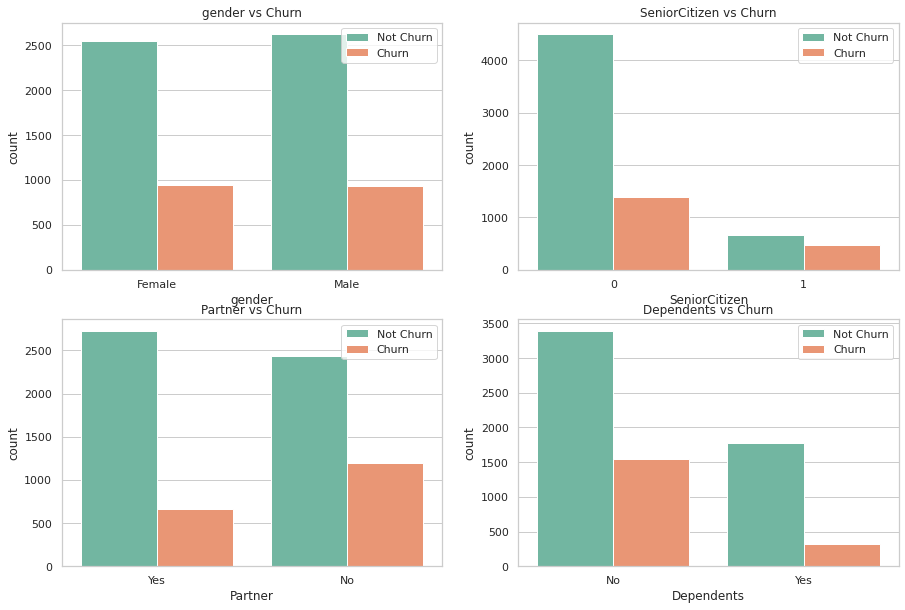

In [13]:
fig, ax = plt.subplots(nrows = 2,ncols = 2, figsize = (15, 10))
customer = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
i = 1
for column in customer:
  plt.subplot(2, 2, i)
  ax = sns.countplot(x = df[column], 
                     data = df, 
                     hue = 'Churn')
  plt.title(f'{column} vs Churn')
  plt.legend(loc = 'upper right', labels = ['Not Churn', 'Churn'])
  i += 1
plt.show()

### Services Subscribed by the Customer: Phone Service, Multiple Lines, Online Service, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies

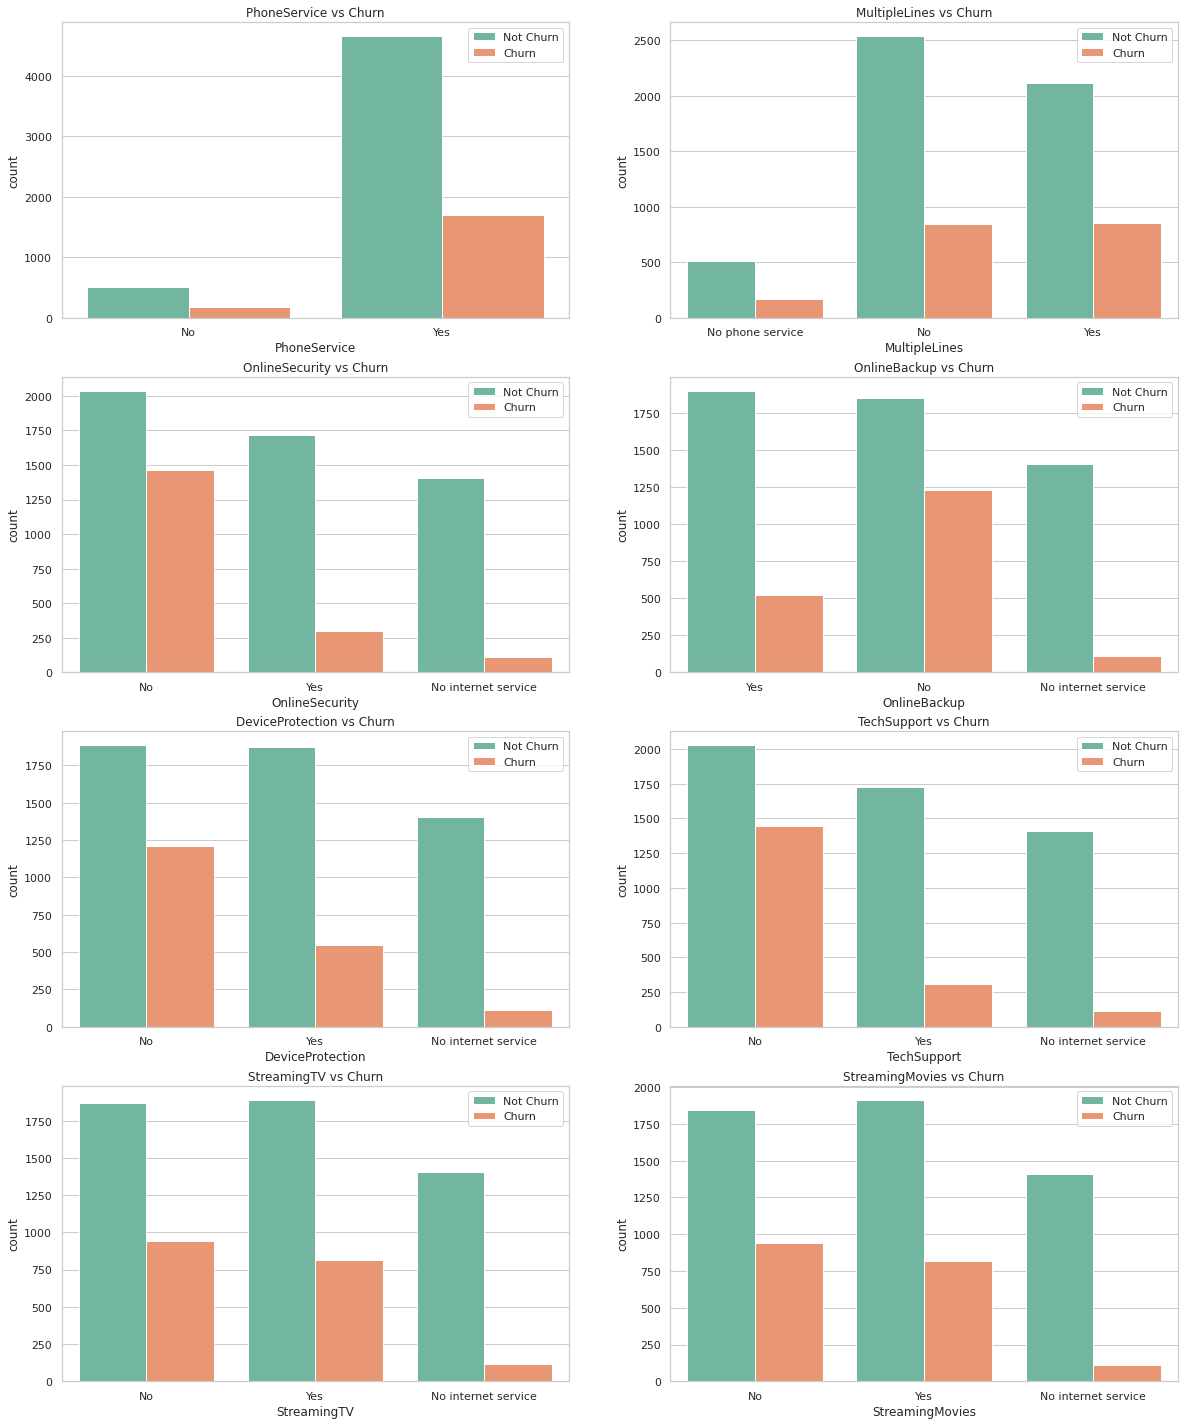

In [14]:
fig, ax = plt.subplots(nrows = 4,ncols = 2, figsize = (20, 25))
service = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
i = 1
for column in service:
  plt.subplot(4, 2, i)
  ax = sns.countplot(x = df[column], 
                     data = df, 
                     hue = 'Churn')
  plt.title(f'{column} vs Churn')
  plt.legend(loc = 'upper right', labels = ['Not Churn', 'Churn'])
  i += 1
plt.show()

### Other services information: Internet Service, Contract, Paperless Billing, Payment Method

<ipython-input-15-fd00ff0936f8>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
<ipython-input-15-fd00ff0936f8>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
<ipython-input-15-fd00ff0936f8>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
<ipython-input-15-fd00ff0936f8>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)


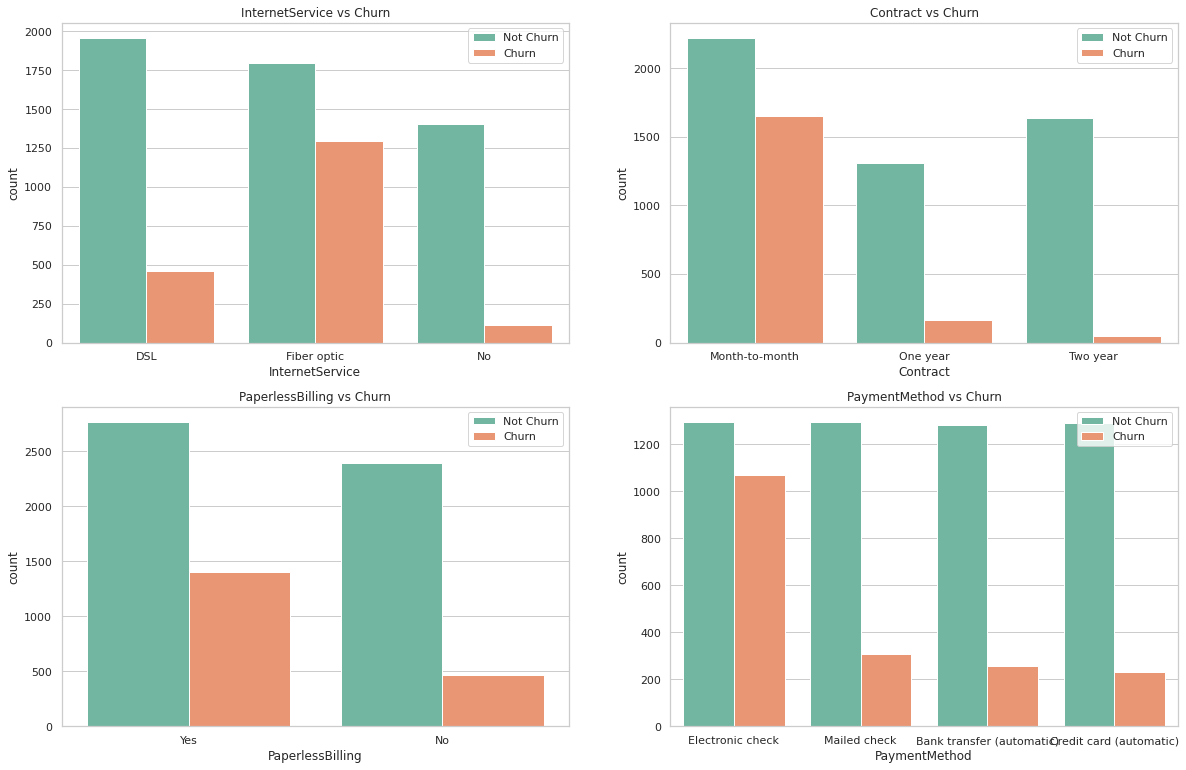

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
otherService = ['InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
i = 1
for column in otherService:
  plt.subplot(3, 2, i)
  ax = sns.countplot(x = df[column], 
                     data = df, 
                     hue = 'Churn')
  plt.title(f'{column} vs Churn')
  plt.legend(loc = 'upper right', labels = ['Not Churn', 'Churn'])
  i += 1
plt.show()

## Numerical variable

### Tenure, Monthly Charges, Total Charges

<ipython-input-16-c3f96077d27f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column][df['Churn'] == 'No'], shade = True)
<ipython-input-16-c3f96077d27f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column][df['Churn'] == 'Yes'], shade = True, ax = ax)
<ipython-input-16-c3f96077d27f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column][df['Churn'] == 'No'], shade = True)
<ipython-input-16-c3f96077d27f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column

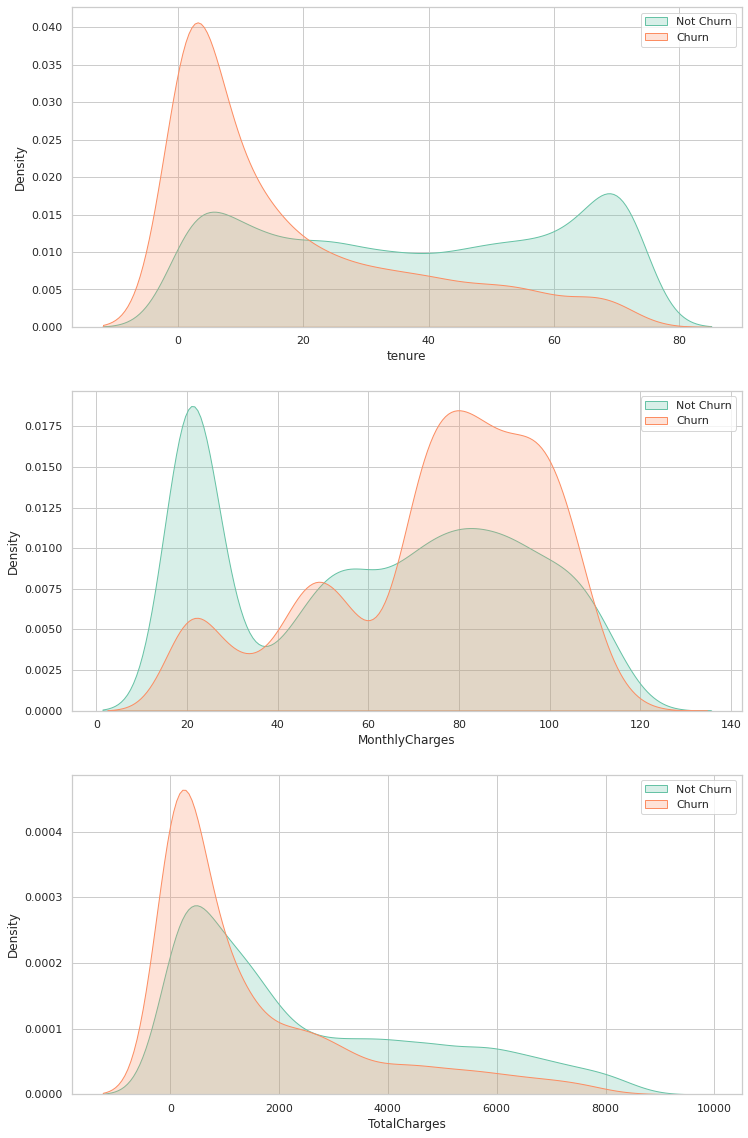

In [16]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 20))
numericData = ['tenure', 'MonthlyCharges', 'TotalCharges']
i = 1
for column in numericData:
  plt.subplot(3, 1, i)
  ax = sns.kdeplot(df[column][df['Churn'] == 'No'], shade = True)
  ax = sns.kdeplot(df[column][df['Churn'] == 'Yes'], shade = True, ax = ax)
  ax.legend(labels = ['Not Churn', 'Churn'])
  i += 1
plt.show()

# Model development

## Data cleaning

In [17]:
# drop unnecessary column
final_df = df.iloc[:, 1:] 

# convert categorical values into numeric values
numeric_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = final_df.drop(numeric_var, axis = 1)

label_encoder = preprocessing.LabelEncoder()
for i in range(len(categorical_features.columns)):
  categorical_features.iloc[:, i] = label_encoder.fit_transform(categorical_features.iloc[:, i])
categorical_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


## Data scaling

In [18]:
# scale the numeric variables
numeric_features = final_df[['tenure', 'MonthlyCharges', 'TotalCharges']]
scaler = StandardScaler()
scaler.fit(numeric_features)
numeric_features = pd.DataFrame(scaler.transform(numeric_features), columns = ['tenure', 'MonthlyCharges', 'TotalCharges'])
numeric_features.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


## Feature selection

In [19]:
numeric_features.reset_index(drop = True, inplace = True)
categorical_features.reset_index(drop = True, inplace = True)
temp_df = pd.concat([numeric_features, categorical_features], axis = 1)
temp_y = temp_df['Churn']
temp_X = temp_df.drop('Churn', axis = 1)

In [20]:
numeric_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

### Categorical variable: Chi-squared

<Axes: >

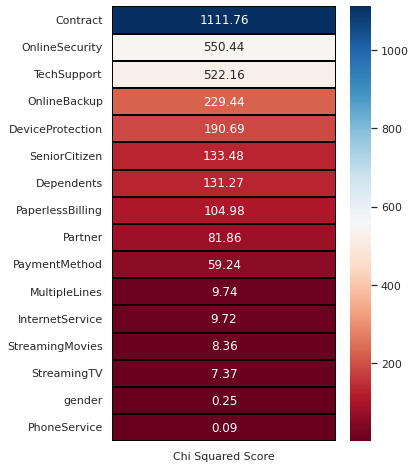

In [21]:
categorical_X = temp_X.drop(numeric_var, axis = 1)
target = temp_y

best_feature = SelectKBest(score_func = chi2, k = 'all')
fit = best_feature.fit(categorical_X, target)

categorical_featuresScores = pd.DataFrame(data = fit.scores_, index = list(categorical_X.columns), columns = ['Chi Squared Score'])

# visualize the chi-squared scores
plt.figure(figsize = (5, 8))
sns.heatmap(categorical_featuresScores.sort_values(ascending = False, by ='Chi Squared Score'), 
            annot = True, 
            fmt = '.2f',
            linewidths = 0.2,
            linecolor = 'black',
            cmap = 'RdBu')


**We should drop MultipleLines, InternetService, StreamingMovies, StreamingTV, gender, PhoneService because of low chi-squared scores.**

### Numeric variable: ANOVA (F statistic)

<Axes: >

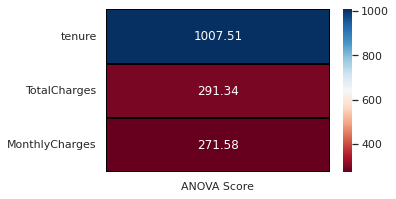

In [22]:
numeric_X = temp_X.loc[:, numeric_var]
target = temp_y

best_feature = SelectKBest(score_func = f_classif, k = 'all')
fit = best_feature.fit(numeric_X, target)

numeric_featuresScores = pd.DataFrame(data = fit.scores_, index = list(numeric_X.columns), columns = ['ANOVA Score'])

# visualize the ANOVA scores
plt.figure(figsize = (5, 3))
sns.heatmap(numeric_featuresScores.sort_values(ascending = False, by ='ANOVA Score'), 
            annot = True, 
            fmt = '.2f',
            linewidths = 0.2,
            linecolor = 'black',
            cmap = 'RdBu')

We should not drop any numeric variables because of high ANOVA scores.

In [23]:
# final data
y = temp_df['Churn']
X = temp_df.drop(['Churn', 'MultipleLines', 'InternetService', 'StreamingMovies', 'StreamingTV', 'gender', 'PhoneService'], axis = 1)

## Data balancing using SMOTE

In [24]:
smote = SMOTE(random_state = 0)
X, y = smote.fit_resample(X, y)

## Model building

In [25]:
# divide training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape

(8260, 13)

In [27]:
X_test.shape

(2066, 13)

### 1. Logistic Regression

In [28]:
def evaluate(y_test, y_pred, modelname):
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  f2 = fbeta_score(y_test, y_pred, beta=2.0)
  model_results = pd.DataFrame([[modelname, acc, prec, rec, f1, f2]],
  columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
  return model_results

In [29]:
from sklearn.linear_model import LogisticRegressionCV

# create a logistic regression model with L1 regularization
lasso_log = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, max_iter=1000)

# fit the model to the training data
lasso_log.fit(X_train, y_train)

# print the selected features
print("Selected Features:")
for i in range(len(X_train.columns)):
    if lasso_log.coef_[0][i] != 0:
        print(X_train.columns[i])


Selected Features:
tenure
MonthlyCharges
TotalCharges
SeniorCitizen
Partner
Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling
PaymentMethod


In [30]:
# check the unique values in y_train
print(np.unique(y_train))

# build the logistic regression model
classifier_log = sm.Logit(y_train, X_train).fit(maxiter = 100, method = 'newton', family = sm.families.Binomial())

# print the model summary
print(classifier_log.summary())

[0 1]
Optimization terminated successfully.
         Current function value: 0.479418
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8260
Model:                          Logit   Df Residuals:                     8247
Method:                           MLE   Df Model:                           12
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.3083
Time:                        15:11:57   Log-Likelihood:                -3960.0
converged:                       True   LL-Null:                       -5725.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
tenure              -1.5700      0.121    -13.024      0.000      -1.806      -1.334
Month

/usr/local/lib/python3.9/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: family. After release 0.14, this will raise.
  warnings.warn(


In [31]:
# make predictions
y_pred = classifier_log.predict(X_test)

# make binary predictions on the test set
y_pred = (classifier_log.predict(X_test) > 0.5).astype(int)

# print the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7904162633107454


<Axes: >

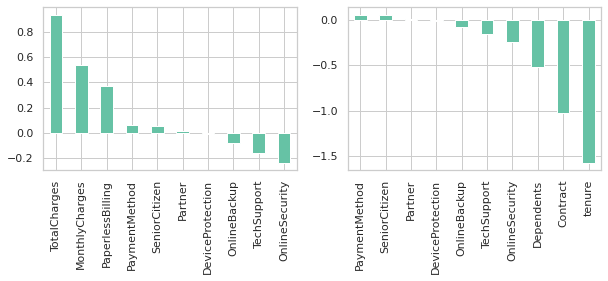

In [32]:
# get the weights of all the variables
weights = pd.Series(classifier_log.params, index = X_train.columns.values)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))
plt.subplot(1, 2, 1)
ax = weights.sort_values(ascending = False)[:10].plot(kind = 'bar')

plt.subplot(1, 2, 2)
weights.sort_values(ascending = False)[-10:].plot(kind = 'bar')

In [33]:
# evaluate the model result
log = evaluate(y_test, y_pred, 'Logistic Regression')
print(log)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.790416   0.771899  0.839623  0.804338  0.825144


### 2. Decision Tree

In [34]:
# build the decision tree model
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier_dt.predict(X_test)

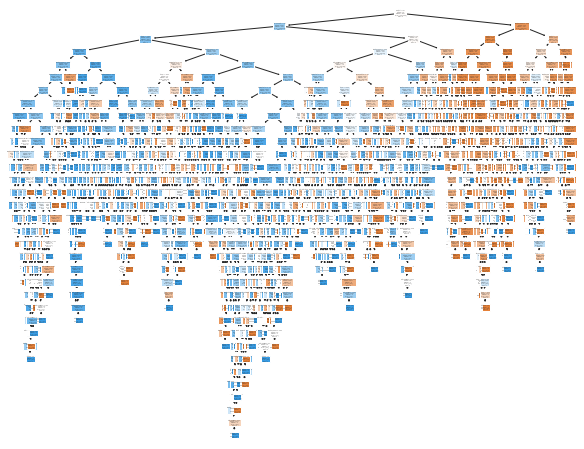

In [35]:
# plot the decision tree
plt.figure(figsize=(10,8))
plot_tree(classifier_dt, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()


In [36]:
# evaluate the model result
dt = evaluate(y_test, y_pred, 'Decision Tree')
print(dt)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Decision Tree  0.766215   0.769374  0.777358  0.773346  0.775748


### 3. Random Forests

In [37]:
# build the random forests model
classifier_rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier_rf.predict(X_test)

In [38]:
# evaluate the model result
rf = evaluate(y_test, y_pred, 'Random Forests')
print(rf)

            Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forests  0.845595   0.834688  0.871698  0.852792  0.864036


### 4. XGBoost

In [39]:
# build the XGB model
classifier_xgb = XGBClassifier(n_estimators = 100)
classifier_xgb.fit(X_train,y_train)

y_pred = classifier_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

In [40]:
# evaluate the model result
xgb = evaluate(y_test, y_pred, 'XGBoost')
print(xgb)

     Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  XGBoost  0.844143   0.831835  0.872642   0.85175  0.864163


## Model Result

In [41]:
print(pd.concat([log, dt, rf, xgb], axis = 0))

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.790416   0.771899  0.839623  0.804338  0.825144
0        Decision Tree  0.766215   0.769374  0.777358  0.773346  0.775748
0       Random Forests  0.845595   0.834688  0.871698  0.852792  0.864036
0              XGBoost  0.844143   0.831835  0.872642  0.851750  0.864163


In [42]:
importances = classifier_rf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) SeniorCitizen                  0.216107
 2) Partner                        0.201015
 3) gender                         0.183690
 4) DeviceProtection               0.118983
 5) StreamingTV                    0.054579
 6) MultipleLines                  0.049332
 7) OnlineBackup                   0.039921
 8) InternetService                0.027360
 9) OnlineSecurity                 0.024138
10) TechSupport                    0.023438
11) PhoneService                   0.022176
12) tenure                         0.022037
13) Dependents                     0.017224
